In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Output path
MainFolder = "Budday2019Data"
out_path = os.path.join("..", MainFolder)

In [4]:
# Neo-Hookean coefficient data
SSm = [0.53, 0.96, 0.89, 1.95]
Cm  = [0.99, 1.75, 1.37, 2.80]
Tm  = [0.29, 0.52, 0.57, 1.22]
Sm  = [0.65, 1.15, 0.99, 2.07]

NeoHookeanCoefs = {'Simple Shear mu':SSm,
                   'Compression mu':Cm,
                   'Tension mu':Tm,
                   'Simultaneous mu': Sm}
    
# Create DataFrame
NeoHookeanCoefs = pd.DataFrame(NeoHookeanCoefs,index=['CC', 'CR', 'BG', 'C'])
print(NeoHookeanCoefs)
NeoHookeanCoefs.to_pickle(os.path.join(out_path, 'NeoHookeanCoefs'))

    Simple Shear mu  Compression mu  Tension mu  Simultaneous mu
CC             0.53            0.99        0.29             0.65
CR             0.96            1.75        0.52             1.15
BG             0.89            1.37        0.57             0.99
C              1.95            2.80        1.22             2.07


In [5]:
# Ogden coefficient data
SSm = [0.32, 0.54, 0.57, 1.06]
Cm  = [0.43, 0.85, 0.83, 1.61]
Tm  = [0.35, 0.61, 0.65, 1.20]
Sm  = [0.35, 0.66, 0.70, 1.43]

SSa = [-22.8, -24.8, -21.7, -25.6]
Ca  = [-22.8, -20.5, -15.5, -16.6]
Ta  = [-26.6, -30.5, -32.5, -43.6]
Sa  = [-25.3, -24.3, -18.7, -19.0]

OgdenCoefs = {'Simple Shear mu':SSm,
              'Compression mu':Cm,
              'Tension mu':Tm,
              'Simultaneous mu':Sm,
              'Simple Shear alpha':SSa,
              'Compression alpha':Ca,
              'Tension alpha':Ta,
              'Simultaneous alpha':Sa}

# Create DataFrame
OgdenCoefs = pd.DataFrame(OgdenCoefs,index=['CC', 'CR', 'BG', 'C'])
print(OgdenCoefs)
OgdenCoefs.to_pickle(os.path.join(out_path, 'OgdenCoefs'))

    Simple Shear mu  Compression mu  Tension mu  Simultaneous mu  \
CC             0.32            0.43        0.35             0.35   
CR             0.54            0.85        0.61             0.66   
BG             0.57            0.83        0.65             0.70   
C              1.06            1.61        1.20             1.43   

    Simple Shear alpha  Compression alpha  Tension alpha  Simultaneous alpha  
CC               -22.8              -22.8          -26.6               -25.3  
CR               -24.8              -20.5          -30.5               -24.3  
BG               -21.7              -15.5          -32.5               -18.7  
C                -25.6              -16.6          -43.6               -19.0  


Plot selected :  Compression of Basal Ganglia using CompressibleOgden Model
Discretization :  10 Steps 20 Elements


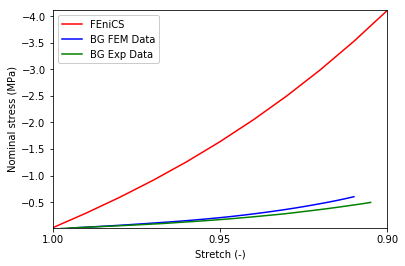

In [28]:
# Region of the brain
Regions = ["Basal Ganglia", "Corona Radiata", "Corpus Callosum", "Cortex"]
Tests   = ["Traction", "Compression", "Simple Shear"]
Models  = ["IncompressibleNeoHookean", "IncompressibleOgden", "CompressibleNeoHookean", "CompressibleOgden"]

# Define data to plot
Region  = Regions[0]
Test    = Tests[1]
Model   = Models[3]

num_steps = 10             # number of time steps
nelements = 20             # number of elements

print("Plot selected : ", Test, "of" ,Region, "using", Model, "Model")
print("Discretization : ", num_steps, "Steps", nelements, "Elements")

# Import data
in_path = "Output" + str(num_steps) + "Steps" + str(nelements) + "Elements"
MainFolder = "Budday2019Data"
Name = Test + Model

if Test == Tests[0]:
    FEMData = "Tension_OgdenFEM_Dat.csv"
    ExpData = "Tension_ExpDat.csv"
    Xaxis = "Stretch (-)"
    Yaxis = "Nominal stress (MPa)"
elif Test == Tests[1]:
    FEMData = "Compression_OgdenFEM_Dat.csv"
    ExpData = "Compression_ExpDat.csv"
    Xaxis = "Stretch (-)"
    Yaxis = "Nominal stress (MPa)"
elif Test == Tests[2]:
    FEMData = "SimpleShear_OgdenFEM_Dat.csv"
    ExpData = "SimpleShear_ExpDat.csv"
    Xaxis = "Shear (-)"
    Yaxis = "Shear stress (MPa)"
    
if Region == Regions[0]:
    Rn = "BasalGanglia"
    Rd = "BG"    
elif Region == Region[1]:
    Rn = "CoronaRadiata"
    Rd = "CR"
elif Region == Region[2]:
    Rn = "CorpusCallosum"
    Rd = "CC"
elif Region == Region[3]:
    Rn = "Cortex"
    Rd = "C"

Inputdata = pd.read_pickle(os.path.join(in_path, 'Output' + Name))
FEMData   = pd.read_csv(os.path.join("..", MainFolder, Rn, Rd + "_" + FEMData),delimiter=";", decimal=",",names=["FEM " + Xaxis,"FEM " +Yaxis])
ExpData   = pd.read_csv(os.path.join("..", MainFolder, Rn, Rd + "_" + ExpData),delimiter=";", decimal=",",names=["Exp " + Xaxis,"Exp " +Yaxis])

inputdf   = pd.DataFrame(Inputdata)
datadf    = pd.concat([FEMData, ExpData], axis=1)

# Print the output
# print(outputdf)
# print(datadf)

# Plot
fig, ax = plt.subplots(1, 1)
inputdf.plot(ax = ax, x = Xaxis, y = Yaxis, color = 'red', linestyle = '-', label = 'FEniCS')
datadf.plot(ax = ax, x = "FEM " + Xaxis, y = "FEM " + Yaxis, color = 'blue', linestyle = '-', label = Rd + ' FEM Data')
datadf.plot(ax = ax, x = "Exp " + Xaxis, y = "Exp " + Yaxis, color = 'green', linestyle = '-', label = Rd + ' Exp Data')
ax.set_xlabel(Xaxis)
ax.set_ylabel(Yaxis)
ax.set_xlim(inputdf[Xaxis][0],inputdf[Xaxis][num_steps])
ax.set_ylim(inputdf[Yaxis][0],inputdf[Yaxis][num_steps])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join(in_path, 'NominalStress - ' + Name + "Comparison" +'.pdf'))